In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_wine
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras.activations import relu,sigmoid, softmax, tanh
from tensorflow.keras.initializers import glorot_normal
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
import time

In [2]:
df = pd.read_csv(r'D:\OneDrive\ENG335\telescope_data.csv')

# EDA

In [3]:
df.isnull().sum()

Unnamed: 0    0
fLength       0
fWidth        0
fSize         0
fConc         0
fConc1        0
fAsym         0
fM3Long       0
fM3Trans      0
fAlpha        0
fDist         0
class         0
dtype: int64

In [4]:
df.describe().transpose()

count         mean          std       min          25%  \
Unnamed: 0  19020.0  9509.500000  5490.745396    0.0000  4754.750000   
fLength     19020.0    53.250154    42.364855    4.2835    24.336000   
fWidth      19020.0    22.180966    18.346056    0.0000    11.863800   
fSize       19020.0     2.825017     0.472599    1.9413     2.477100   
fConc       19020.0     0.380327     0.182813    0.0131     0.235800   
fConc1      19020.0     0.214657     0.110511    0.0003     0.128475   
fAsym       19020.0    -4.331745    59.206062 -457.9161   -20.586550   
fM3Long     19020.0    10.545545    51.000118 -331.7800   -12.842775   
fM3Trans    19020.0     0.249726    20.827439 -205.8947   -10.849375   
fAlpha      19020.0    27.645707    26.103621    0.0000     5.547925   
fDist       19020.0   193.818026    74.731787    1.2826   142.492250   

                   50%           75%         max  
Unnamed: 0  9509.50000  14264.250000  19019.0000  
fLength       37.14770     70.122175    334.1770  
fWidth        17.13990     24.739475    256.3820  
fSize          2.73960      3.101600      5.3233  
fConc          0.35415      0.503700      0.8930  
fConc1         0.19650      0.285225      0.6752  
fAsym          4.01305     24.063700    575.2407  
fM3Long       15.31410     35.837800    238.3210  
fM3Trans       0.66620     10.946425    179.8510  
fAlpha        17.67950     45.883550     90.0000  
fDist        191.85145    240.563825    495.5610

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'fLength'}>,
        <AxesSubplot:title={'center':'fWidth'}>],
       [<AxesSubplot:title={'center':'fSize'}>,
        <AxesSubplot:title={'center':'fConc'}>,
        <AxesSubplot:title={'center':'fConc1'}>],
       [<AxesSubplot:title={'center':'fAsym'}>,
        <AxesSubplot:title={'center':'fM3Long'}>,
        <AxesSubplot:title={'center':'fM3Trans'}>],
       [<AxesSubplot:title={'center':'fAlpha'}>,
        <AxesSubplot:title={'center':'fDist'}>, <AxesSubplot:>]],
      dtype=object)

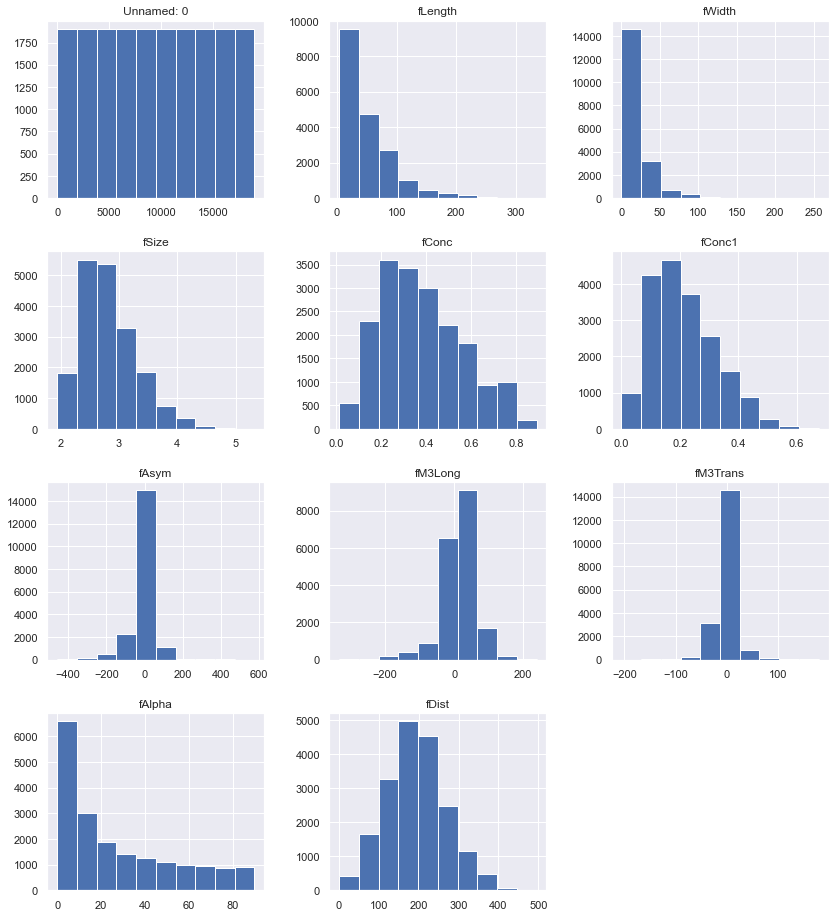

In [5]:
sns.set()
df.hist(figsize=(14,16))

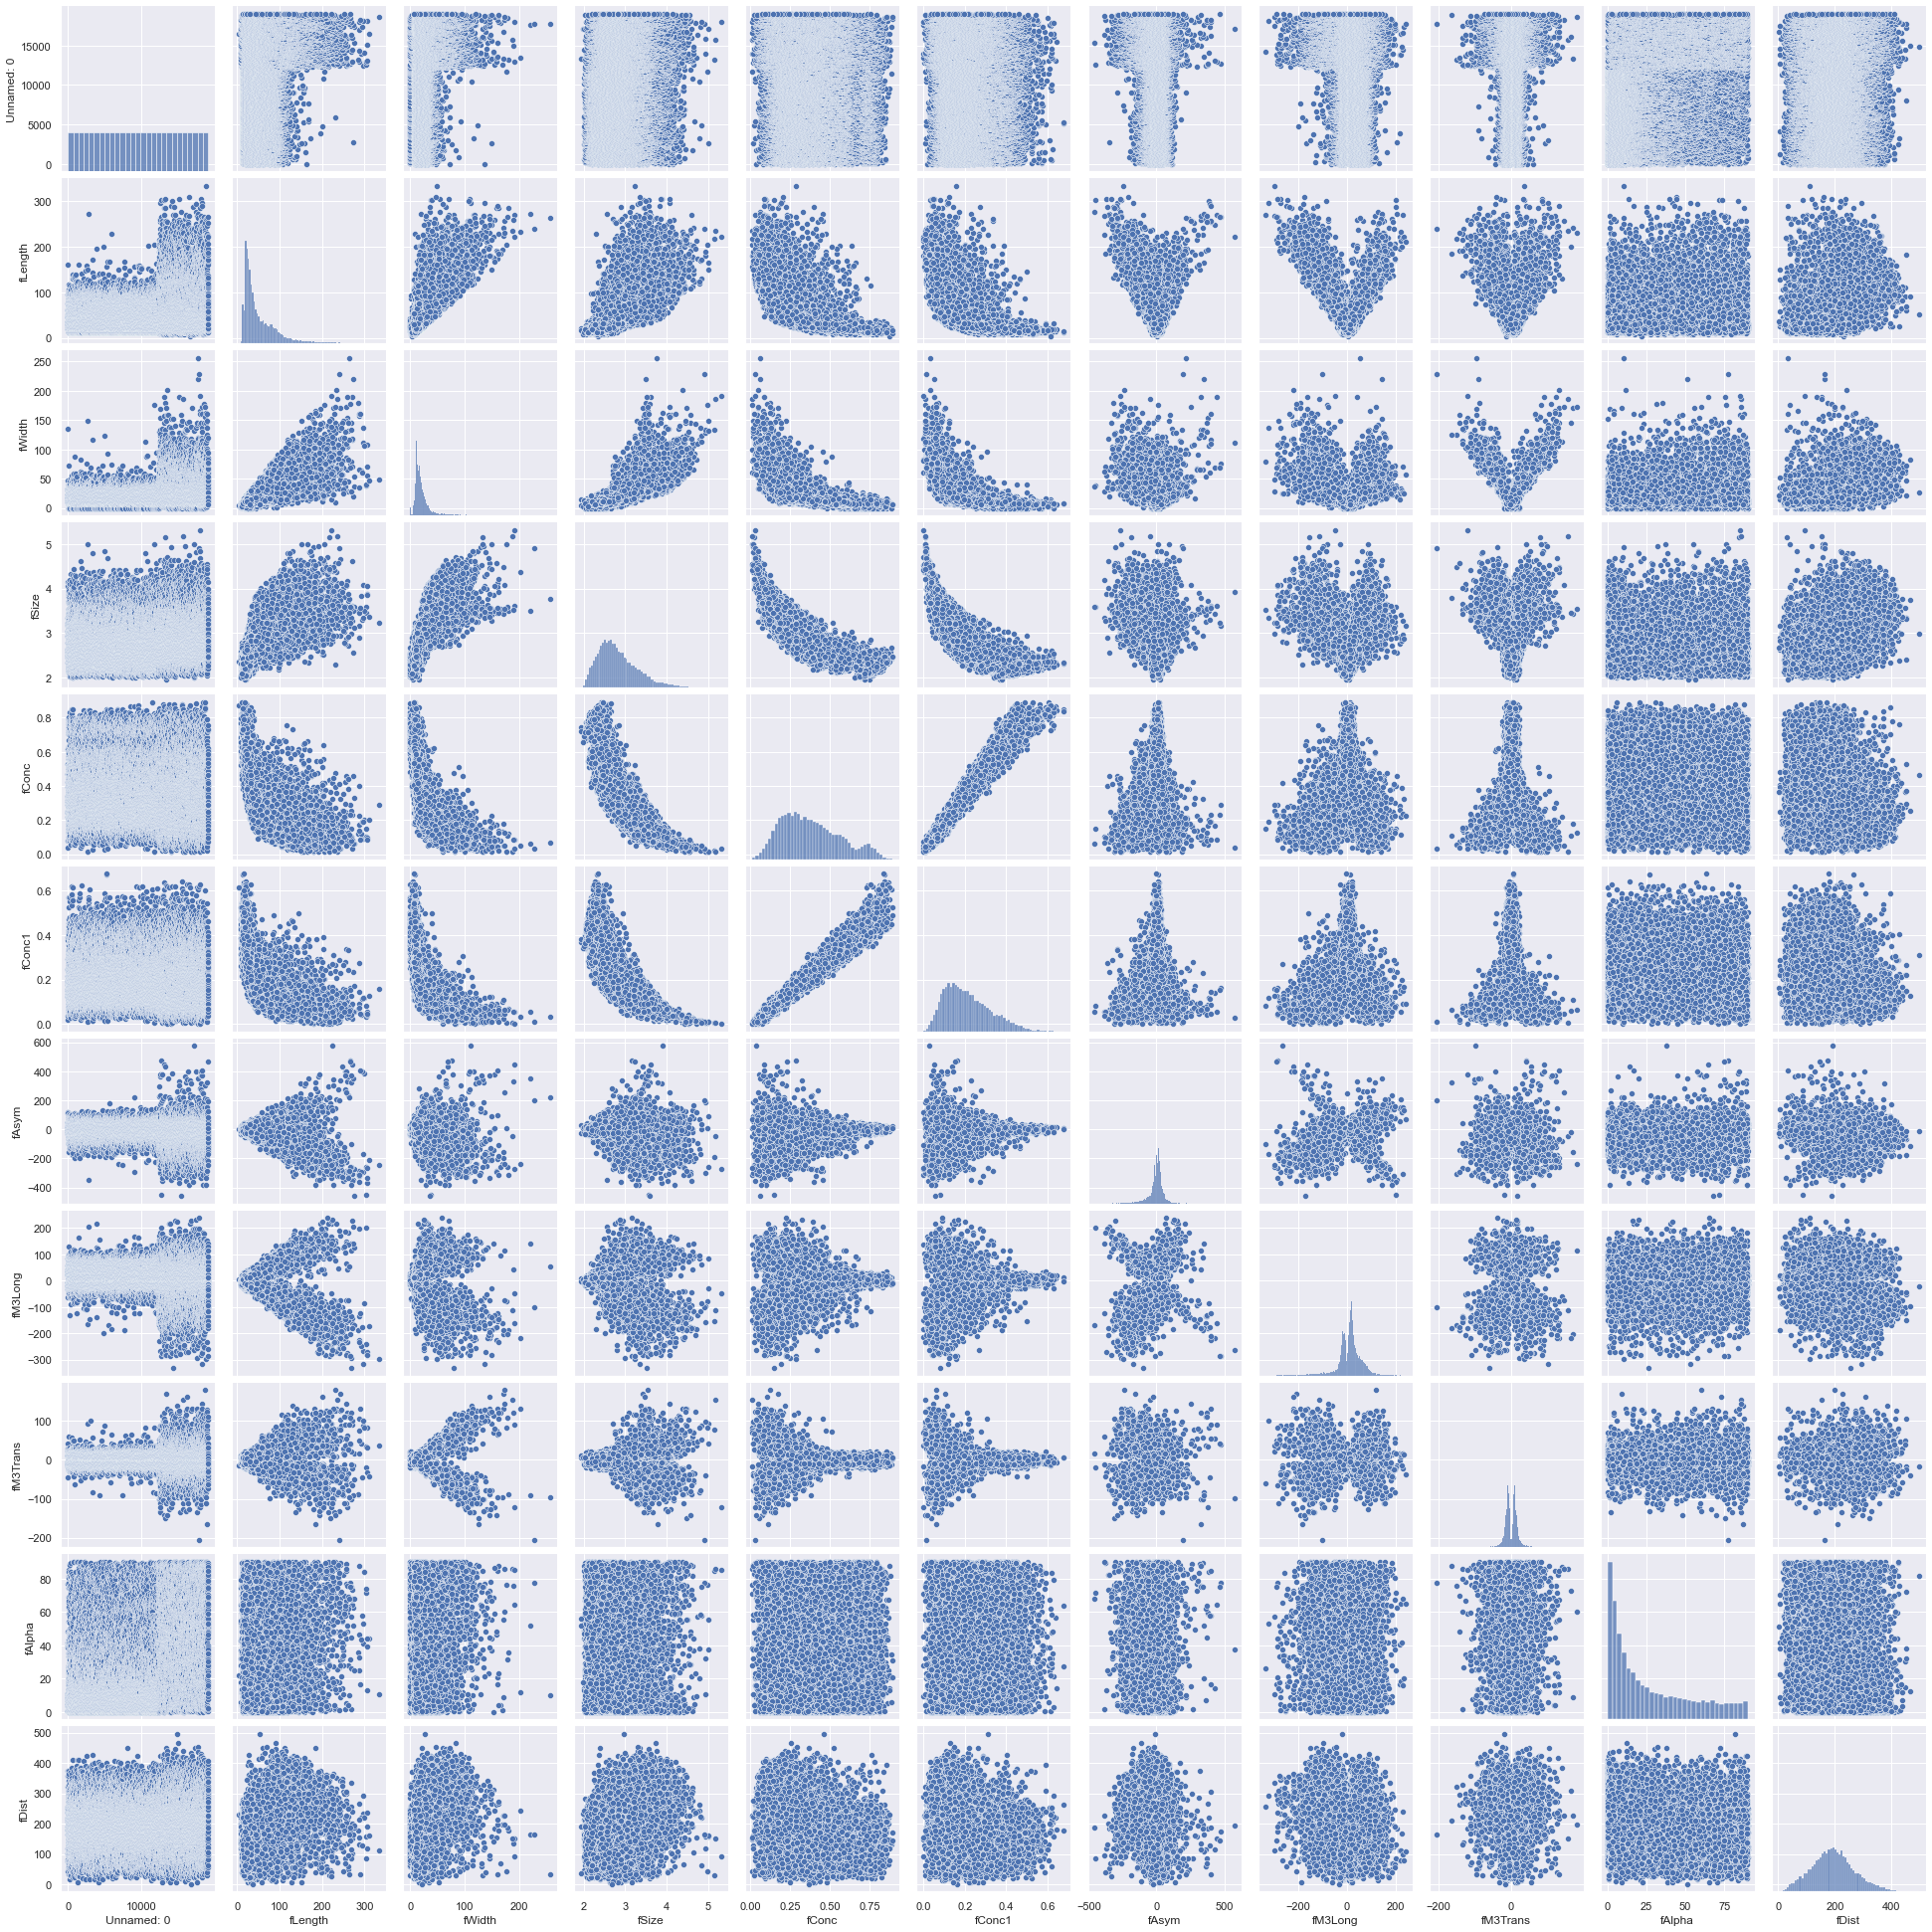

In [6]:
sns.pairplot(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
df.head()

Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  \
0           0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   
1           1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   
2           2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580   
3           3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   
4           4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   

   fM3Trans   fAlpha     fDist class  
0   -8.2027  40.0920   81.8828     g  
1   -9.9574   6.3609  205.2610     g  
2  -45.2160  76.9600  256.7880     g  
3   -7.1513  10.4490  116.7370     g  
4   21.8393   4.6480  356.4620     g

In [9]:
df = df.drop(columns =['Unnamed: 0'], axis = 1)

In [10]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [11]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['class']


In [12]:
X = df.drop('class', axis=1)
X.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620

In [13]:
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

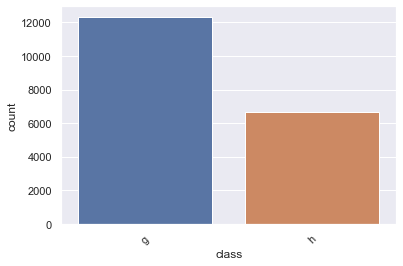

In [14]:
sns.countplot(x='class', data=df)
plt.xticks(rotation=45)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [16]:
X=df.drop(['class'],axis=1)
X.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620

In [17]:
X.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')

In [18]:
Y = df['class']
Y.head()

0    g
1    g
2    g
3    g
4    g
Name: class, dtype: object

In [19]:
Y.dtypes

dtype('O')

In [20]:
# convert to category dtype
Y = Y.astype('category')
# creating dictionary to understand allocation
dict_Y = dict(enumerate(Y.cat.categories))
print(dict_Y)
# convert to category codes
Y = Y.cat.codes

{0: 'g', 1: 'h'}


In [21]:
X_1, X_test ,y_1, y_test = train_test_split(X,Y.ravel(),test_size=0.2) #20% for testing 
X_train, X_val, y_train, y_val = train_test_split(X_1,y_1,test_size=0.2) #64% for train, 16% for val, 20% test

In [22]:
train = X_train.copy()
train['class'] = y_train

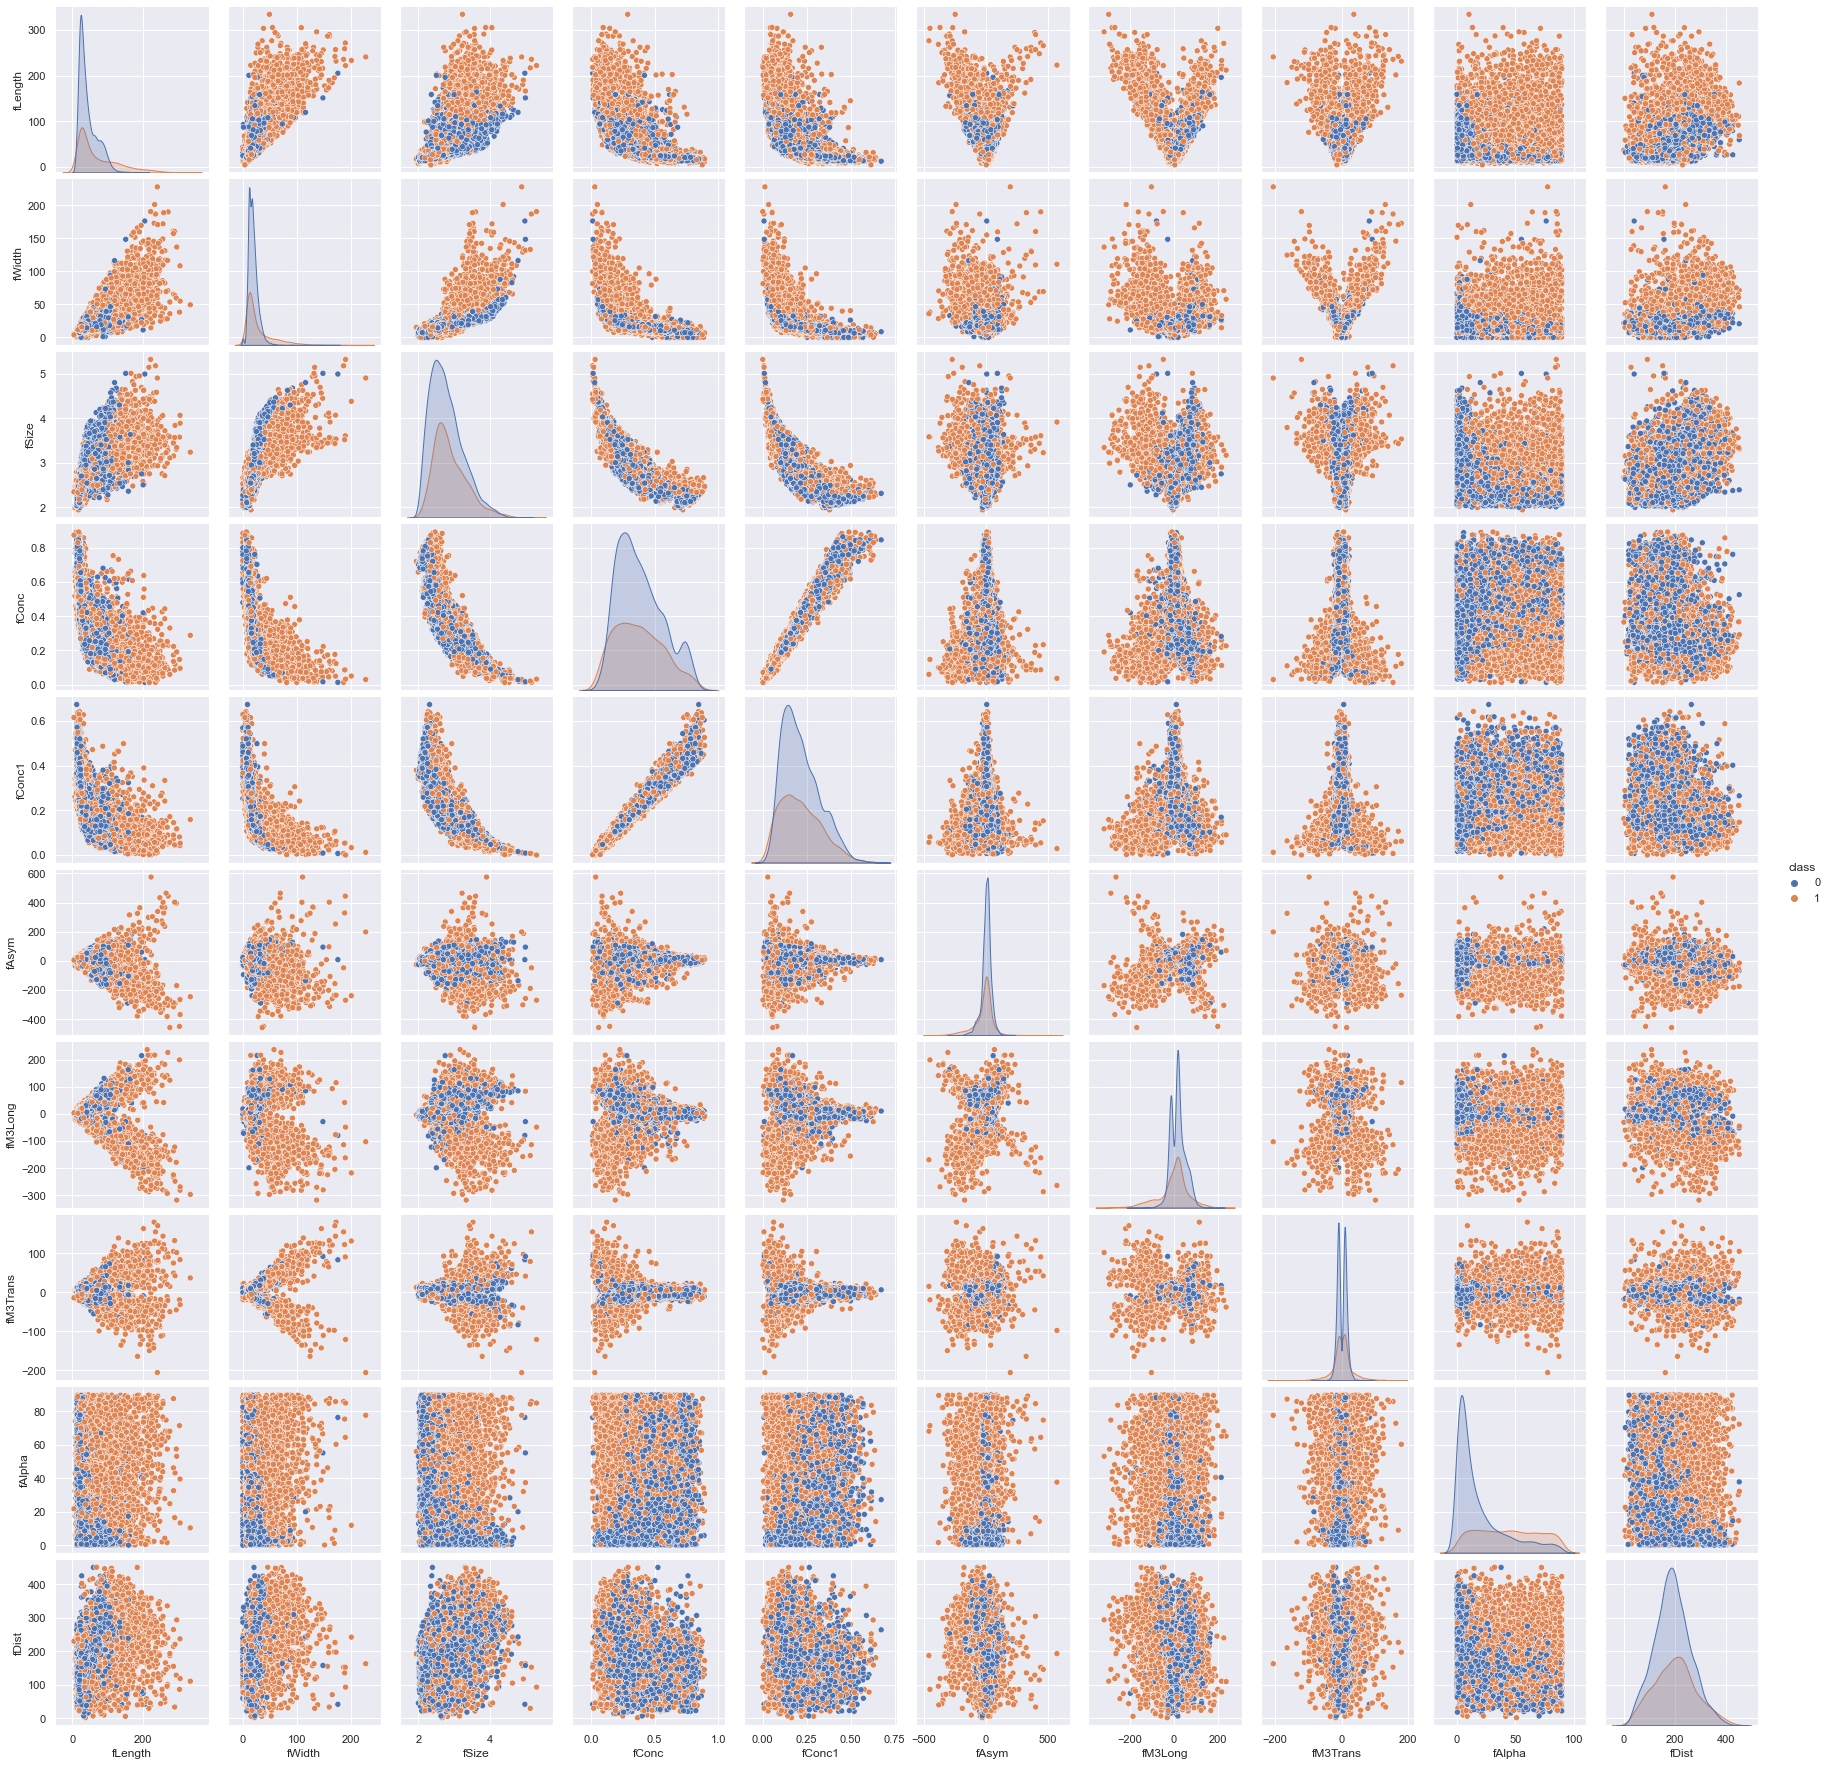

In [23]:
sns.pairplot(train,hue='class')

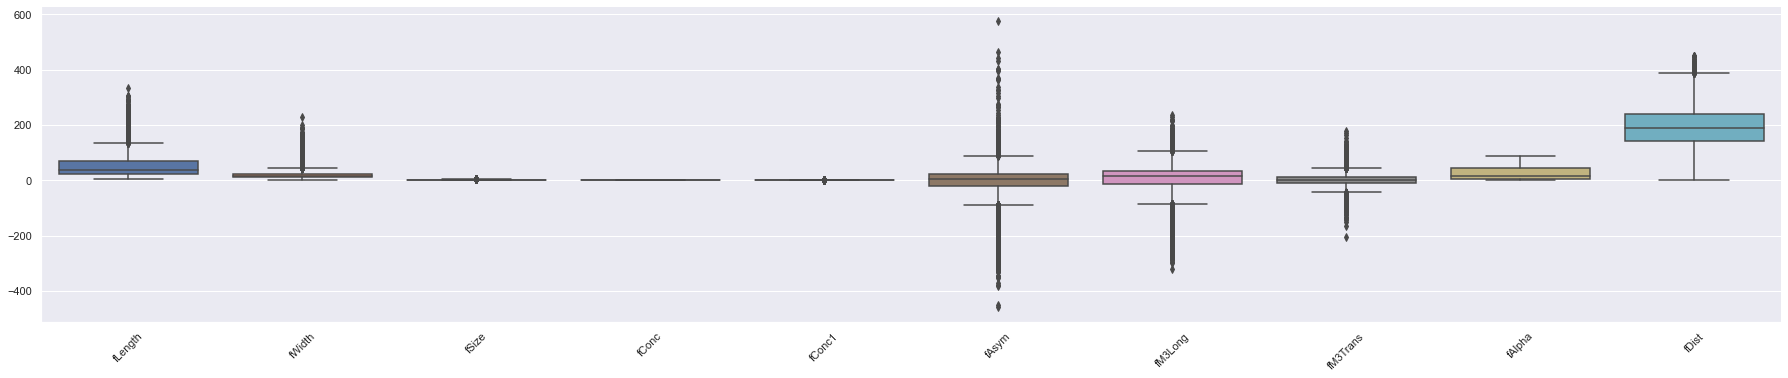

In [24]:
sns.catplot(data=X_train, kind='box', height=5, aspect=5)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Features Correlating with label')

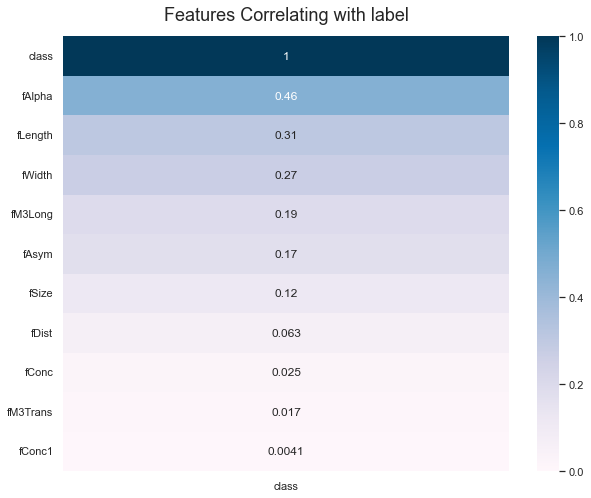

In [25]:
plt.figure(figsize=(10,8))
#rank the absolute values of the parameters' correlation
heatmap = sns.heatmap(abs(train.corr()[['class']]).sort_values(by='class', ascending=False), vmin=0, vmax=1, annot=True, cmap='PuBu')
heatmap.set_title('Features Correlating with label', fontdict={'fontsize':18}, pad=16)

In [26]:
X_train.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
dtype: object

In [27]:
print ("Shape of X_train = ",X_train.shape)
print ("Shape of X_test = ",X_test.shape)
print ("Shape of y_train = ",y_train.shape)
print ("Shape of y_test = ",y_test.shape)

Shape of X_train =  (12172, 10)
Shape of X_test =  (3804, 10)
Shape of y_train =  (12172,)
Shape of y_test =  (3804,)


In [28]:
#one hot encoding
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
y_test

array([0, 1, 0, ..., 1, 1, 0], dtype=int8)

In [30]:
X_train.columns

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')

# Random Forest

In [31]:
val_score =[]
train_score = []
trees = list(range(10,110,10))
depth = list(range(1,11,1))
print(trees)
print(depth)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


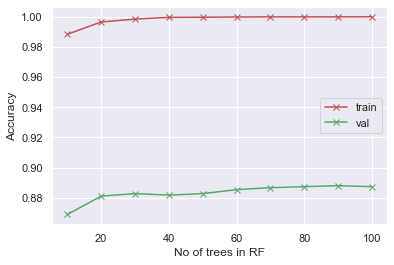

In [32]:
for n in trees:
  RF= RandomForestClassifier(n_estimators=n,random_state=0) 
  RF.fit(X_train,y_train)
  train_score.append(RF.score(X_train, y_train))
  val_score.append(RF.score(X_val, y_val))
  
import matplotlib.pyplot as plt
plt.plot(trees, train_score,'r-x',label='train')
plt.plot(trees, val_score,'g-x', label='val')
plt.xlabel("No of trees in RF")
plt.ylabel("Accuracy")
plt.legend()

In [33]:
ind = val_score.index(max(val_score))
opt_trees = trees[ind]
print(opt_trees)

90


In [34]:
%%time
RF= RandomForestClassifier(n_estimators=opt_trees)
RF.fit(X_train,y_train) #using both train and val dataset for final model construction

CPU times: total: 2.61 s
Wall time: 2.61 s


RandomForestClassifier(n_estimators=90)

In [35]:
name = ['g', 'h']

In [36]:
y_pred = RF.predict(X_test)
print("score :",RF.score(X_test,y_test))
print(classification_report(y_test, y_pred, target_names=name))

score : 0.8851209253417456
              precision    recall  f1-score   support

           g       0.88      0.95      0.91      2443
           h       0.89      0.78      0.83      1361

    accuracy                           0.89      3804
   macro avg       0.89      0.86      0.87      3804
weighted avg       0.89      0.89      0.88      3804



In [37]:
RF.classes_

array([0, 1], dtype=int8)

In [38]:
# 0 = g
# 1 = h
RF.predict_proba(X)

array([[0.92222222, 0.07777778],
       [0.63333333, 0.36666667],
       [0.01111111, 0.98888889],
       ...,
       [0.04444444, 0.95555556],
       [0.        , 1.        ],
       [0.        , 1.        ]])

# Pattern was caused by gamma signal

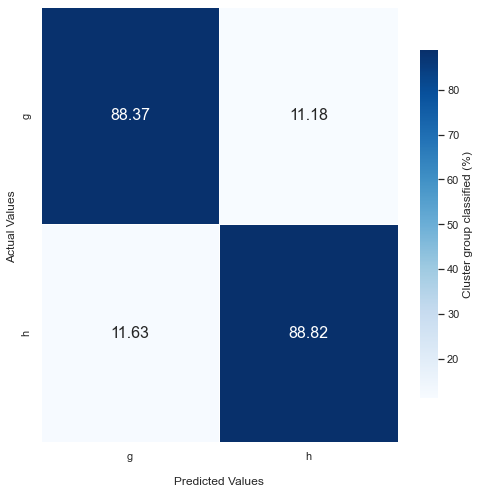

In [39]:
cm = confusion_matrix(y_test, y_pred)
# Figure plotting
cmap = sns.color_palette('Blues', as_cmap=True) # color map
fig, ax = plt.subplots(figsize=(8, 8))
cm_percent = ((cm/cm.sum(axis=0))*100)
cm_percent = np.nan_to_num(cm_percent, copy=True, nan=0.0, posinf=None, neginf=None)
sns.heatmap(cm_percent, cmap = cmap, annot=True, fmt=".2f", linewidth=1, cbar_kws={"label": "Cluster group classified (%)", "shrink": .8}, annot_kws={"size": 16}) #selecting for percentage only column 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(name)
ax.yaxis.set_ticklabels(name)
plt.show()

# Feature Importance

In [40]:
feature_scores = pd.Series(RF.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

fAlpha      0.235092
fLength     0.154659
fWidth      0.118318
fSize       0.110777
fM3Long     0.087866
fDist       0.070634
fConc       0.060121
fConc1      0.059453
fAsym       0.052176
fM3Trans    0.050904
dtype: float64

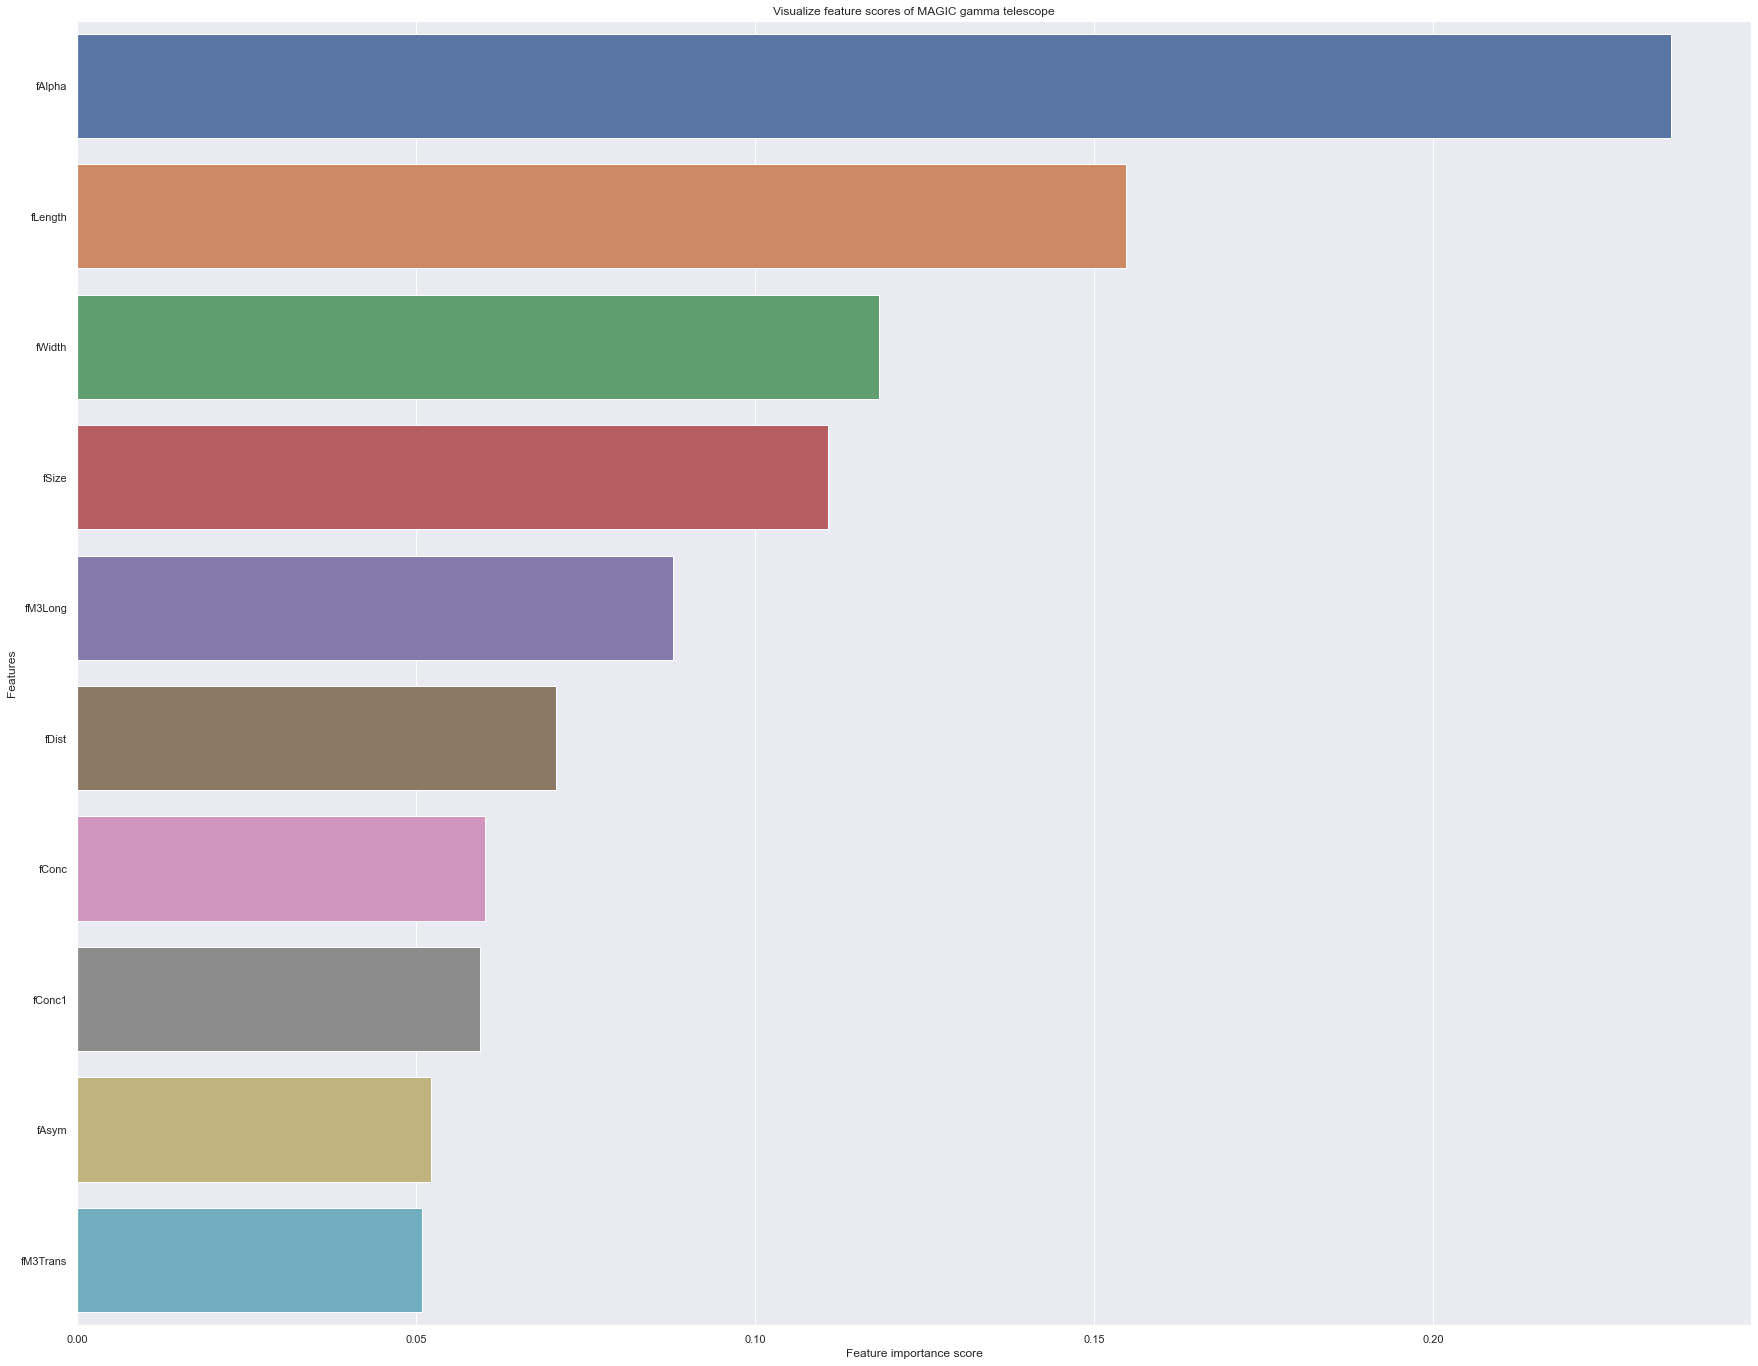

In [41]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of MAGIC gamma telescope")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# Optimized random forest 

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 10, cv = 10, verbose=2,  n_jobs = 4)

In [45]:
%%time
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: total: 1min 36s
Wall time: 19min 4s


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [46]:
y_pred = rf_random.predict(X_val)

In [47]:
# Print the tuned parameters
print("Tuned Decision Tree Parameters: {}".format(rf_random.best_params_))

Tuned Decision Tree Parameters: {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': False}


In [48]:
# Print the tuned score
print("Best score is {}".format(rf_random.best_score_))

Best score is 0.8721652614237547


In [49]:
print (f'Train Accuracy - : {rf_random.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_random.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.887


In [50]:
name

['g', 'h']

In [51]:
print(classification_report(y_test,rf_random.best_estimator_.predict(X_test), target_names=name))

              precision    recall  f1-score   support

           g       0.89      0.94      0.91      2443
           h       0.88      0.79      0.83      1361

    accuracy                           0.89      3804
   macro avg       0.89      0.87      0.87      3804
weighted avg       0.89      0.89      0.89      3804



In [52]:
cm2 = confusion_matrix(y_test, rf_random.best_estimator_.predict(X_test))
print(cm2)

[[2299  144]
 [ 286 1075]]


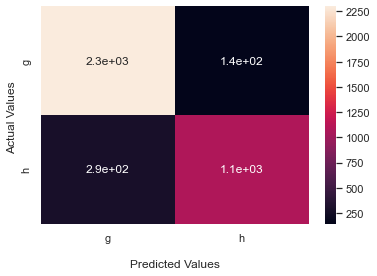

In [53]:
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax=ax);  

# labels, title and ticks
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(name)
ax.yaxis.set_ticklabels(name)
plt.show()

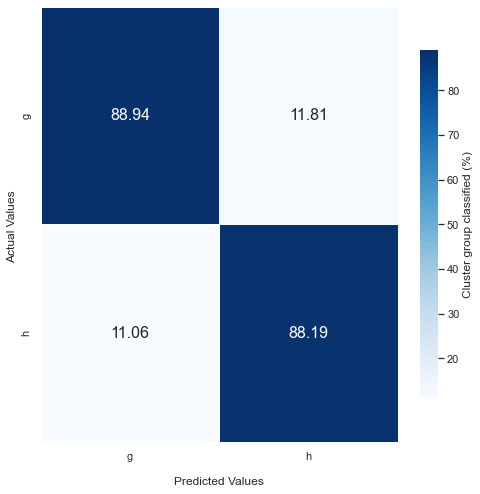

In [54]:
# Figure plotting
cmap2 = sns.color_palette('Blues', as_cmap=True) # color map
fig, ax = plt.subplots(figsize=(8, 8))
cm_percent2 = ((cm2/cm2.sum(axis=0))*100)
cm_percent2 = np.nan_to_num(cm_percent2, copy=True, nan=0.0, posinf=None, neginf=None)
sns.heatmap(cm_percent2, cmap = cmap2, annot=True, fmt=".2f", linewidth=1, cbar_kws={"label": "Cluster group classified (%)", "shrink": .8}, annot_kws={"size": 16}) #selecting for percentage only column 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(name)
ax.yaxis.set_ticklabels(name)
plt.show()

# Naïve Bayes algorithm

In [55]:
model2_df = df.copy()

In [56]:
Y2 = model2_df['class']
Y2.head()

0    g
1    g
2    g
3    g
4    g
Name: class, dtype: object

In [57]:
X2 = model2_df.drop('class', axis=1)
X2.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620

In [58]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2)

In [59]:
model2 = GaussianNB()

In [60]:
%%time
model2.fit(X_train2, Y_train2)

CPU times: total: 15.6 ms
Wall time: 11 ms


GaussianNB()

In [61]:
y2_pred = model2.predict(X_test2)
print("Accuracy: %.2f"
      % accuracy_score(y2_pred, Y_test2))
print("Classification Report for NB\n")
print(classification_report(Y_test2, y2_pred, target_names=name))

Accuracy: 0.74
Classification Report for NB

              precision    recall  f1-score   support

           g       0.74      0.92      0.82      2496
           h       0.72      0.39      0.50      1308

    accuracy                           0.74      3804
   macro avg       0.73      0.65      0.66      3804
weighted avg       0.73      0.74      0.71      3804



In [62]:
y_pred2=model2.predict(X_test2) 
cm3 = confusion_matrix(Y_test2, y2_pred)
print(cm3)

[[2299  197]
 [ 803  505]]


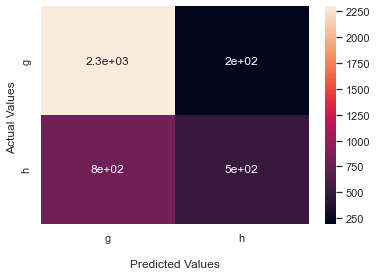

In [63]:
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax=ax);  

# labels, title and ticks
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(name)
ax.yaxis.set_ticklabels(name)
plt.show()

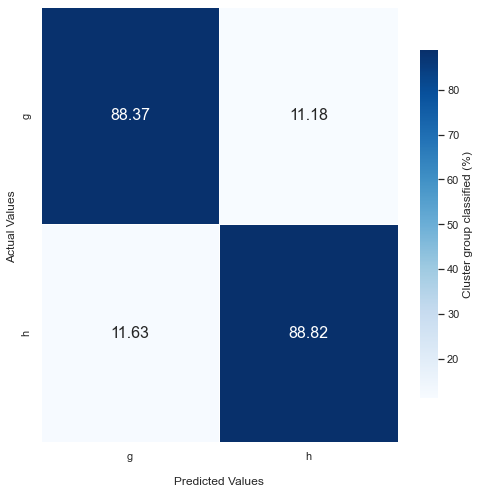

In [64]:
# Figure plotting
cmap3 = sns.color_palette('Blues', as_cmap=True) # color map
fig, ax = plt.subplots(figsize=(8, 8))
cm_percent3 = ((cm3/cm3.sum(axis=0))*100)
cm_percent3 = np.nan_to_num(cm_percent3, copy=True, nan=0.0, posinf=None, neginf=None)
sns.heatmap(cm_percent, cmap = cmap3, annot=True, fmt=".2f", linewidth=1, cbar_kws={"label": "Cluster group classified (%)", "shrink": .8}, annot_kws={"size": 16}) #selecting for percentage only column 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(name)
ax.yaxis.set_ticklabels(name)
plt.show()